# **Modelling motor proteins with random walk in a ratchet potential switched on and of**

# **Excercise 1:** _The diffusion equation_
<hr>


## **a)**

We are given the function:

$$
\phi(x,t) = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy.
$$

We want to show that it satisfies the diffusion equation:

$$
\frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2}.
$$


### **Step 1: Compute $ \frac{\partial \phi}{\partial t} $**

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left[ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \right].
$$

Using the product rule we obtain

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left( \frac{1}{\sqrt{4\pi D t}} \right)  \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy
+ \frac{1}{\sqrt{4\pi D t}} \frac{\partial}{\partial t} \left( \int_{-\infty}^{\infty} h(y)  e^{-\frac{(x-y)^2}{4Dt}} \, dy \right).
$$
Furthermore, applying the Lebniz integration rule:

$$
\frac{\partial \phi}{\partial t} = \frac{\partial}{\partial t} \left( \frac{1}{\sqrt{4\pi D t}} \right) \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \, dy
+ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) \frac{\partial}{\partial t} e^{-\frac{(x-y)^2}{4Dt}} \, dy.
$$

Differentiating the prefactor and the exponential term gives

$$
\frac{d}{dt} \left( \frac{1}{\sqrt{4\pi D t}} \right) = -\frac{1}{2} \frac{1}{\sqrt{4\pi D t^3}}.
$$


$$
\frac{\partial}{\partial t} \left( e^{-\frac{(x-y)^2}{4Dt}}\right) = e^{-\frac{(x-y)^2}{4Dt}} \cdot \frac{(x-y)^2}{4D t^2}.
$$
Substituting back, we obtain

$$
\frac{\partial \phi}{\partial t} = -\frac{1}{2} \frac{1}{\sqrt{4\pi D t^3}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} + \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \cdot \frac{(x-y)^2}{4D t^2}.
$$
Which simplifies to
$$
\frac{\partial \phi}{\partial t} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left( \frac{(x-y)^2}{4D t^2} - \frac{1}{2t} \right) \, dy.
$$
<hr>


### **Step 2: Compute $ \frac{\partial^2 \phi}{\partial x^2} $**
$$
\frac{\partial \phi}{\partial x} = \frac{\partial}{\partial x} \left[ \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} dy \, h(y) e^{-\frac{(x-y)^2}{4Dt}} \right].
$$

Using the chain rule

$$
\frac{\partial \phi}{\partial x} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left(-\frac{x-y}{2Dt}\right) \, dy.
$$

Differentiating again

$$
\frac{\partial^2 \phi}{\partial x^2} = \frac{1}{\sqrt{4\pi D t}} \int_{-\infty}^{\infty} h(y) e^{-\frac{(x-y)^2}{4Dt}} \left( \frac{(x-y)^2}{4D^2 t^2} - \frac{1}{2Dt} \right) \, dy.
$$
<hr>

### **Step 3: Verify the Diffusion Equation**

Comparing the expressions for $ \frac{\partial \phi}{\partial t} $ and $ D \frac{\partial^2 \phi}{\partial x^2} $, we find that:

$$
\frac{\partial \phi}{\partial t} = D \frac{\partial^2 \phi}{\partial x^2}.
$$

Thus, $ \phi(x,t) $ satisfies the diffusion equation.
<hr>

## **1b)**
From the probability of finding a particle at a position $x$ in a potential landscape $V(x)$ as $$ P(x) = \frac{e^{-\beta V(x)}}{Z},$$ we are going to show how this results in the following probabilities for the particles movement:

$$ p^+ = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0 + 1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}}$$
$$p^0 = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0)]} + e^{-\beta [V(x_0+1) - V(x_0)]}}$$
$$p^- = \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}}.$$

By inserting the definition of the canonical partition function $Z$ with the energy being equal to the potential energy $V(x)$ at different positions, we obtain:


$$ P(x) = \frac{e^{-\beta V(x)}}{Z} = \frac{e^{-\beta V(x)}}{e^{-\beta V(x_0-1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0 +1)}}$$


Since the probability of finding a particle at a position $x$ must be equal to the probability of the particle moving to $x$, we find the probability of the particle moving to $x_0 - 1$ as:


$$ p^-  = P(x_0-1) = \frac{e^{-\beta V(x_0-1)}}{e^{-\beta V(x_0-1)} + e^{-\beta V(x_0)} + e^{-\beta V(x_0 +1)}}.$$ 

Doing the algebra and simplifying gives

$$ p^- = \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}}.$$


By repeating this process for the remaining steps $x_0$ and $x_0 + 1$, we obtain:


$$p^0 = P(X_0) = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0)]} + e^{-\beta [V(x_0+1) - V(x_0)]}}$$

$$p^+ = P(X_0+1) = \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0 + 1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}} \quad \blacksquare.$$  
<hr>



## **1c)**

### First case: $k_B T$ $\gg$ $\lvert V(x+1) - V(x) \rvert$

One can see that for the boundary condition when $k_B T$ $\gg$ $\lvert V(x+1) - V(x) \rvert$, each exponential term in the denominator in the three probablities {${p^+, p^0, p^-}$} goes to 1. 

- For $p^+$, we notice that the third term in the denominator describes the potential difference between two adjacent poential steps. Given the boundary condition, this potential difference is significantly smaller than $k_B T$. This yields an expression $e$ to the power of 0, making the exponential term go towards 1. For the second term, we notice that this describes the potential difference between $x_0-1$ and $x_0+1$, giving us the expression $\frac {2 \lvert V(x+1) - V(x) \rvert} {k_B T}$ in the exponent, which will also have the term go towards 1. Resulting in the probablitiy $p^+$ going towards $\frac 1 3$.

- For $p^0$, we notice that both the exponential terms describe a potential step from $x_0$ to $±1$. Similarly for the case of $p^+$, these terms are significantly smaller than $k_B T$, making each term go towards 1, ultimately letting the probability $p^0$ go towards $\frac 1 3$

- For $p^-$, we use the same arguments as for $p^+$. The exponents in both the exponential terms are both significantly smaller than $k_B T$, which yields a $e$ to the power of 0, also giving a probability of $\frac 1 3$.

As a final remark, one may notice that the sum of each probability {${p^+, p^0, p^-}$} sums up to 1, following the law of conservation of probability.
<hr>

### **Second case: $k_B T$ $\ll$ $\lvert V(x+1) - V(x) \rvert$**

For the case where $k_B T$ $\ll$ $\lvert V(x+1) - V(x) \rvert$, we will see that one of the expressions will go to 1, while the other two expressions will die out and go towards 0. We consider $V(x_0-1)$, $V(x_0)$, and $V(x_0+1)$ to be respective potential steps, and will assume that $V(x_0-1)$ $\ll$ $V(x_0)$ $\ll$ and $V(x_0+1)$. Using this, we may examine each of the exponential terms in the three expressions:
- For $p^+$, we notice that $V(x_0-1)-V(x_0+1)$ will yield a negative number. Using the given boundary condition, we are now considering a negative number divided by $\beta$, a significantly smaller number. The whole term will then yield $e$ to the power of a large positive number, resulting in the term exploding towards infinity. For $V(x_0)-V(x_0+1)$, we notice that this will produce a negative number similar to the former term. However, due to the explosive growth of the exponential function, this term will be negligible. At last, the boundary condition will have $å^+$ go towards 0

- For $p^0$, following the same steps as above, we notice that the denominator will quickly explode to infinity, yielding a propability of 0.

- For $p^-$, we now notice that both the exponential terms, $V(x_0+1)-V(x_0-1)$ and $V(x_0)-V(x_0-1)$, have exponents yielding a positive number. This will result in both terms being raised to the power of negative infinity, making them decay quickly. This will result in $p^-$ going towards 1.

Similarly to the first case, the probability is conserved.
<hr>

### **Simplifying the random walk using an energy scale argument**
Using an energy scale argument, we consider the two extremes described in the two boundary conditions. In one extreme, the temperature is significantly larger than the energy potentials and as discussed above, this results in the energy potential being negligible to the probability. In the second extreme case the temperature is significantly smaller than the potentials. As a result, the energy potential plays the dominating role for the probabability. This is assuming that the potential energy grows monotonously as $x$ goes from smaller to bigger values of $x$. However, this might not always be the case. The potential might decrease monotonously, and it might oscillate. This will however not change the proposed argument. For higher temperatures, the potential will still be negligible, while lower temperatures will have probabilities dependant on the potential differences. 
<hr>

# **Excercise 2:** _Random walk in a potential_
<hr>

In this task we are going to plot the distrubution of the particles after random walking. The first part of this task contains the main code. All the partial assignments will send values to this main code. 

**Main code:**

In [37]:
## IMPORTING LIBRARIES
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [38]:
class Particle:
    def __init__(self, potentialFunction, betak):
        self.x = 0
        self.V = potentialFunction
        self.betak = betak

    def pPlus(self):
        return 1 / (1 + np.exp(-self.betak * (self.V(self.x - 1) - self.V(self.x + 1))) 
                    + np.exp(-self.betak * (self.V(self.x) - self.V(self.x + 1))))
    
    def pMinus(self):
        return 1 / (1 + np.exp(-self.betak * (self.V(self.x + 1) - self.V(self.x - 1))) 
                    + np.exp(-self.betak * (self.V(self.x) - self.V(self.x - 1))))


    def walkStep(self):
        prob = random.uniform(0, 1)
        if prob <= self.pMinus():
            self.x -= 1
        if prob > 1 - self.pPlus():
            self.x += 1
        else:
            self.x = self.x
    
    def getPos(self):
        return self.x
    
    def getProb(self):
        return float(self.pMinus()), float(1 - (self.pPlus() + self.pMinus())), float(self.pPlus())
    

In [39]:
## HOVEDFUNKSJONEN SOM UTFØRER BEREGNINGENE

def calculation(V, name):
    betakList = [0.01, 1, 100]
    fig, ax = plt.subplots(1, 3, figsize=(13, 4))

    for i, betak in enumerate(betakList):
        Particles = [Particle(V, betak) for _ in range(numberOfParticles)]
        for j, _ in enumerate(range(numberOfSteps)):
            #print(f'Step: {j} with beta*k = {betak}')
            for particle in Particles:
                particle.walkStep()

        positions = np.array([particle.getPos() for particle in Particles])
        mu, sigma = stats.norm.fit(positions)
        x = np.linspace(min(positions), max(positions), 1000)
        pdf = stats.norm.pdf(x, mu, sigma)
        ax[i].plot(x, pdf, 'r-', label=f"μ={mu:.2f}, σ={sigma:.2f}, βk {betak}")
        ax[i].hist(positions, bins=20, density=True, alpha=0.6, color='g')
        ax[i].set_title(f"βk = {betak}")
        ax[i].set_xlabel("Position")
        ax[i].set_ylabel("Probability density")
        ax[i].legend(loc='upper left')

    fig.suptitle(f"Particle distribution with potential {name}")
    plt.show()

numberOfParticles = 10_000 
numberOfSteps = 200

V = {'k' : lambda x: 1,
     '-k*x' : lambda x: -x, 
     'k(x/15 - np.cos(x/3))' : lambda x: x/15 - np.cos(x/3), 
     'k*x**4' : lambda x: x**4}



## 2a)

We are given the potential energy $V(x) = k$ and are going to fit a normal distribution to the resulting particle distribution after 200 timesteps. 

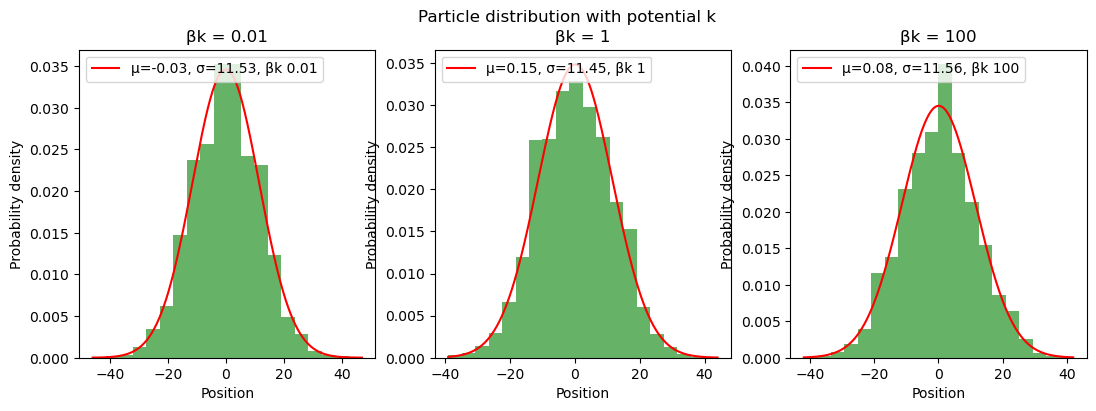

In [40]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k'], "k")

We observe that the particles are distributed in a bell curve for all cases $\beta k \in $ {0.01, 1, 100}. This may be explained by inserting the given condition $V(x) = k$ in the distributions for {$p^+, p^0, p^-$}.

$$
p^+ = P(x_0+1) =    \left. \frac{1}{1 + e^{-\beta [V(x_0-1) - V(x_0 + 1)]} + e^{-\beta [V(x_0) - V(x_0+1)]}} \right|_{V(x)=k} = 
                    \frac{1}{1 + e^{-\beta [k - k]} + e^{-\beta [k - k]}} = \frac 1 3
$$

$$
p^0 = P(x_0+1) =    \left. \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0)]} + e^{-\beta [V(x_0-1) - V(x_0)]}} \right|_{V(x)=k} =
                    \frac{1}{1 + e^{-\beta [k - k]} + e^{-\beta [k - k]}} = \frac 1 3
$$

$$ 
p^- = P(x_0-1) =    \left. \frac{1}{1 + e^{-\beta [V(x_0+1) - V(x_0-1)]} + e^{-\beta [V(x_0) - V(x_0-1)]}} \right|_{V(x)=k} =
                    \frac{1}{1 + e^{-\beta [k - k]} + e^{-\beta [k - k]}} = \frac 1 3
$$

This result shows that a particle in a constant potential landscape moves in an unbiased manner, i.e. the movement reduces to Brownian motion. From the theory section, we have that $X(t)$ it a stochastic process giving the position of a particle at a time $t$. We now observe that the simulation may be described as a sum om identical stochastic variables. We then have from the central limit theorem that the sum of these stochastic variables will converge to a normal distribution, as we also observe from the simulation.
<hr>

## 2b)

We are given the potential energy $V(x) = -kx$ and are going to fit a normal distribution to the resulting particle distribution after 200 timesteps. 

/Users/heddakarinenerby/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


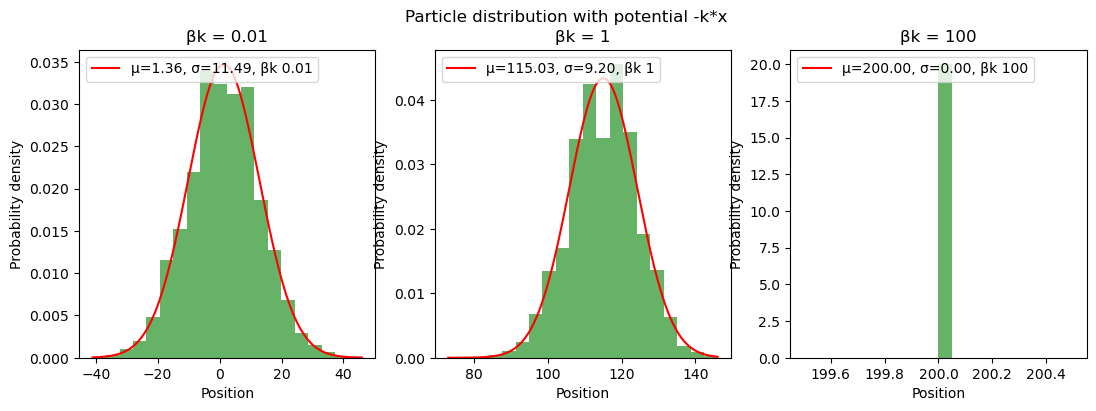

In [41]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['-k*x'], "-k*x")

The plot shows the particles have a biased movement towards the right, as the energy potential also decreass in that direction. 
<hr>

# 2c)

We are given the potential energy $V(x) = k(\frac{x}{15}-\cos \frac{x}{3})$ and are going to fit a normal distribution to the resulting particle distribution after 200 timesteps. In addition we will compare the difference between the particle distribution for $\beta k = 0.1$ and $\beta k = 100$ by analyzing how the particles behave in this potential landscape.

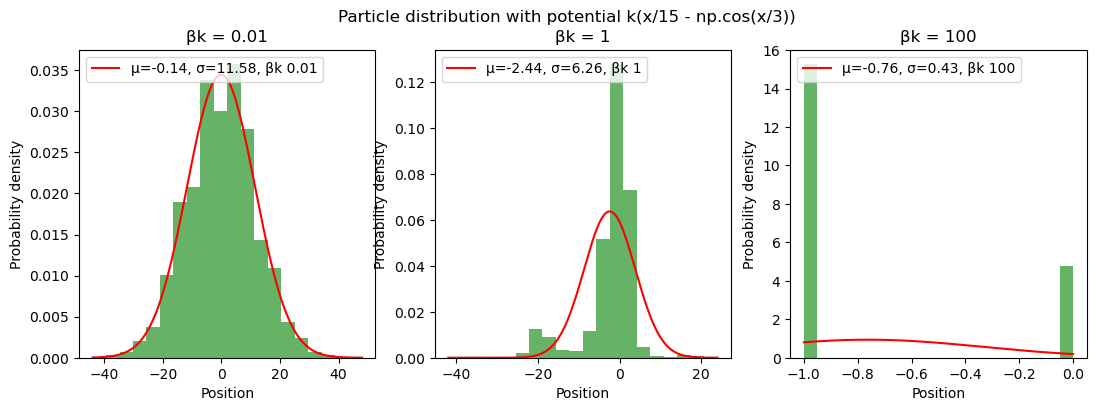

In [42]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k(x/15 - np.cos(x/3))'], 'k(x/15 - np.cos(x/3))')



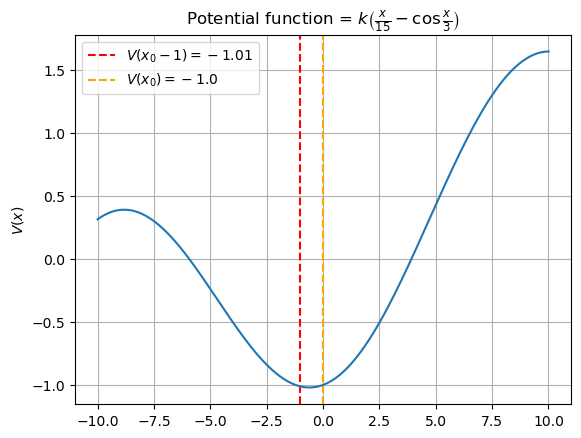

In [43]:
# Plotting the potential 
x = np.linspace(-10,10,1000)
y = [V['k(x/15 - np.cos(x/3))'](i) for i in x]
V_0 = V['k(x/15 - np.cos(x/3))'](0)                                      # calculating the potential in x = 0
V_v = round(V['k(x/15 - np.cos(x/3))'](-1),2)                            # calculating the potential in x = -1, rounded to wdo decimals.

plt.axvline(-1, linestyle = "--", color = 'red', label = f"$V(x_0-1) = {V_v}$" )
plt.axvline(0, linestyle = "--", color = 'orange', label = f"$V(x_0) = {V_0}$")
plt.ylabel("$V(x)$")
plt.title("Potential function = " r"$k\left(\frac{x}{15} - \cos\frac{x}{3}\right)$")
plt.plot(x, y)
plt.legend()
plt.grid()
plt.show()

The particle distributions shows a big difference between $\beta k = 1$ and $\beta k = 100$. When $\beta k$ is high, the temperature must be low since $\beta = \frac{1}{k_BT}$. From 1c) we know that the movement of the particles will primarily be determined by the potential energy $V(x)$ when the temperature is low. The potential energy function shows a potential well, where the particles will have the least energy at the bottom. The particles initial position is at $x_0 = 0$, and a step to the right will result in the particle gaining more energy. Since every object seeks the least amount of energy, it is highly unlikely that the particles will move to the right. The energy is the lowest between the positions 0 and -1, and hence the particles will most likely either stay put, or move to the left. As indicated in the plot for the potential function, the position $x_0-1$ has a slightly smaller energy level, with the difference beeing $0.01$. As a result it will be a slightly bigger probability that the particles take one step to the left, and therefore most of the particles are distributed at $x = -1$ in the particle distribution plot for $\beta = 100$.

## 2d)

We are given the potential energy $V(x) = k x^4$ and are going to fit a normal distribution to the resulting particle distribution after 200 timesteps. We will also discuss if $\beta k$ kan be used as a ratio to determine whether the thermal energy or potential energy dominates the random walk behavior in this potential.

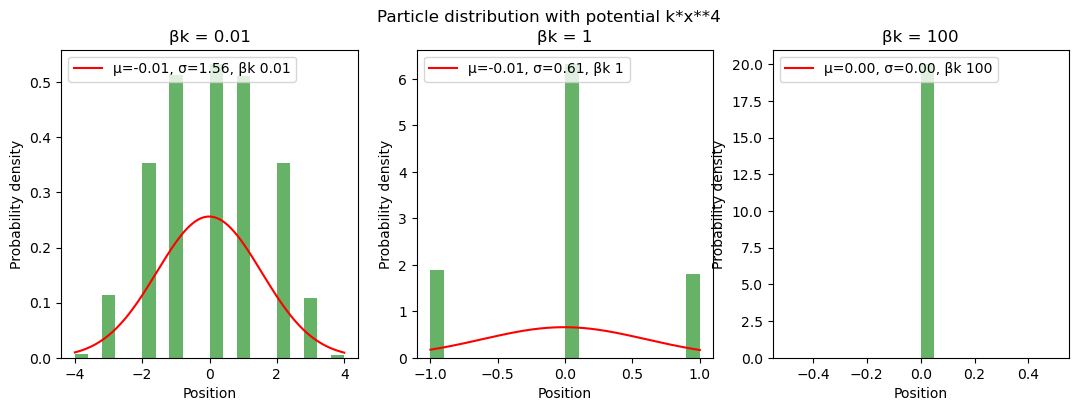

In [44]:
# Plotting the particle distribution by using the calculation-function for the given potential.
calculation(V['k*x**4'], 'k*x**4')

It is mentioned that $\beta k$ to some extent can be interpreted as the ratio between the potential energy scale and the thermal energy scale: $$\beta k = \frac{V(x)}{k_BT} = \frac{kx^4}{k_BT}.$$ From this definition, a low value of $\beta k$ implies that the temperature $T$ is high. By implementing the results from excercise 1c) we know that at high temperatures the probability of the particle moving to the right, left or staying put is equal: $$p^+ = p^0 = p^- = \frac{1}{3}.$$ This also shown in the plot for $\beta k=0.01$, since the position of the particles fits a normal distribution. 

By the same argument; if $\beta k$ is high then $V(x) >> k_BT$ and $T$ must be low. From 1c) a low temperature 

det er forskjell på hvor partiklene starter; du kan bruke betak om de begynner i 0. begynner de andre steder vil døm dette ned og til 0 fordi de er i nedoverbakke (se potensialfunksjonen).

spørsmål: vil det ikke gjelde for konstant potensial (2a) fordi beta blir nullet i potensen??

**Konklusjon**

<hr>

## **Excercise 3:** _Random walk in a ratched potential_

For this excercise we are going to plot the position of the particles and the current they create while moving in one of the two potensials
$$
V_2(x) = x
$$ 
or
$$
V_1(x) = 
\begin{cases}
    k \frac{x}{\alpha N x}, & 0 < x \leq \alpha N x \\
    -k \frac{x}{(1 - \alpha) N x} & -(1 - \alpha) N x < x \leq 0.
\end{cases}
$$


The structure of this excercise is similar to that of task 2, with one main code and individual input for the partial assignments.

**Main code:**

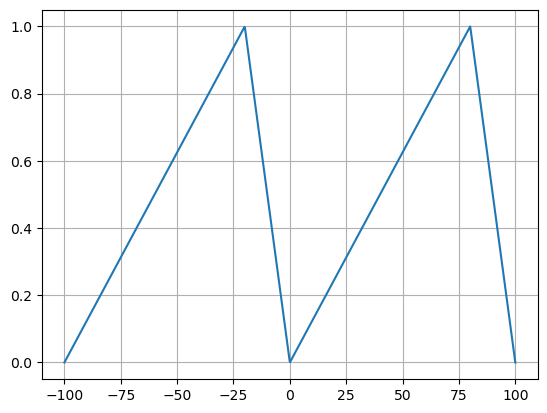

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.special import erfc
import os
import sys

def sawtoothPotential(x, alpha, N_x): # can only get values between -100 and 100
    if x > -N_x and x <= -(1 - alpha) * N_x:
        return k * (x + N_x) / (alpha * N_x)
    if x > -(1 - alpha) * N_x and x <= 0:
        return - k * x / ((1 - alpha) * N_x)
    if x > 0 and x <= alpha * N_x:
        return k * x / (alpha * N_x)
    if x > alpha * N_x and x <= N_x:
        return - k * (x-N_x) / ((1 - alpha) * N_x)
    else:
        return False


def analyticalAverageCurrent(alpha, T_p, N_x):
    return N_x / (4 * T_p) * (erfc(alpha * N_x / 2 * np.sqrt(3/T_p)) - erfc((1-alpha) * N_x / 2 * np.sqrt(3/T_p)))

def progressBar(iterable, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    https://stackoverflow.com/questions/3173320/text-progress-bar-in-terminal-with-block-characters
    Call in a loop to create terminal progress bar
    @params:
        iterable    - Required  : iterable object (Iterable)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    total = len(iterable)
    # Progress Bar Printing Function
    def printProgressBar (iteration):
        percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
        filledLength = int(length * iteration // total)
        bar = fill * filledLength + '-' * (length - filledLength)
        print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Initial Call
    printProgressBar(0)
    # Update Progress Bar
    for i, item in enumerate(iterable):
        yield item
        printProgressBar(i + 1)
    # Print New Line on Complete
    print()

N_x = 100 # steps per potetial period
k = 1

if __name__ == "__main__":
    x = np.linspace(-N_x, N_x, 1000)
    y = [sawtoothPotential(i, 0.8, N_x) for i in x]
    plt.plot(x, y)
    plt.grid()
    plt.show()

In [3]:
class Particle:
    def __init__(self, potentialFunction, alpha, startPos = 0, betak=1000, N_x=100, id = False):
        self.alpha = alpha
        self.id = id
        self.xPos = startPos
        self.time = 0
        self.absxPos = 0
        self.movement = 0
        self.sawtoothPotetial = potentialFunction
        self.constantPotetial = lambda x, alpha, N_x: 1
        self.activePotetial = self.constantPotetial
        self.betak = betak
        self.N_x = N_x

    def pPlus(self):
        return 1 / (1 + np.exp(-self.betak * (self.activePotetial(self.xPos - 1, self.alpha, self.N_x)
                                               - self.activePotetial(self.xPos + 1, self.alpha, self.N_x))) 
                    + np.exp(-self.betak * (self.activePotetial(self.xPos, self.alpha, self.N_x)
                                             - self.activePotetial(self.xPos + 1, self.alpha, self.N_x))))
    
    def pMinus(self):
        return 1 / (1 + np.exp(-self.betak * (self.activePotetial(self.xPos + 1, self.alpha, self.N_x)
                                               - self.activePotetial(self.xPos - 1, self.alpha, self.N_x))) 
                    + np.exp(-self.betak * (self.activePotetial(self.xPos, self.alpha, self.N_x)
                                             - self.activePotetial(self.xPos - 1, self.alpha, self.N_x))))

    def potentialSwitch(self):
        if self.activePotetial == self.constantPotetial:
            self.activePotetial = self.sawtoothPotetial
        else:
            self.activePotetial = self.constantPotetial

    def walkStep(self, T_p):
        self.time += 1

        if self.time % T_p == 0:
            self.potentialSwitch()
        
        prob = random.uniform(0, 1)
        if prob <= self.pMinus():
            self.movement = -1
            self.xPos -= 1
            self.absxPos -= 1
            if self.xPos < -self.N_x:
                self.xPos = self.N_x

        elif prob > 1 - self.pPlus():
            self.movement = 1
            self.xPos += 1
            self.absxPos += 1
            if self.xPos > self.N_x:
                self.xPos = -self.N_x
        else:
            self.movement = 0
        
        return self.absxPos
    
    def getPosition(self):
        return self.xPos
    
    def getProbebility(self):
        return float(self.pMinus()), float(1 - (self.pPlus() + self.pMinus())), float(self.pPlus())

    def __str__(self):
        if self.id:
            return f"{self.id + 1}: {self.xPos}"
        else:
            return f"{self.xPos}"

In [4]:
def opg3aSim():
    alpha = 0.1
    T_p = 200
    N_p = 3
    cycles = 75
    timeSteps = cycles * 2 * T_p

    Particles = [Particle(sawtoothPotential, alpha) for _ in range(N_p)]
    ParticlesAbsPos = [[] for _ in range(N_p)]
    for i, particle in enumerate(Particles): # simulates all particles
        ParticlesAbsPos[i] = [particle.walkStep(T_p) for _ in range(timeSteps)] # run walkstep [simulation] for all
                                                                                # particles and store the absolute position    
    return ParticlesAbsPos

def opg3bSim(alpha, N_p):
    T_p = 500 
    cycles = 10
    timeSteps = cycles * 2 * T_p
    startPositons = np.linspace(-N_x, N_x, N_p)
    normalizedParticleCurrent = []

    Particles = [Particle(sawtoothPotential, alpha, startPos) for startPos in startPositons]
    for _ in progressBar(range(timeSteps), prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over timesteps
        [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
        movementCount = Counter(particle.movement for particle in Particles)
        normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p)

    split_array = np.array_split(normalizedParticleCurrent, cycles)
    averageCurrent = [float(np.mean(part)) for part in split_array] # average current per cycle

    return averageCurrent

def opg3cSim(N_p):
    alpha = 0.8
    averageCurrent = []
    normalizedParticleCurrent = []
    startPosistions = [0] * ( N_p // 2) + [100] * (N_p // 2)
    T_pList = np.linspace(1, 1001, 50).astype(int)
    for T_p in progressBar(T_pList, prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over different timeintervals: 
        Particles = [Particle(sawtoothPotential, alpha, startPos) for startPos in startPosistions]   
        for _ in range(int(2 * T_p )): # Iterate over timesteps
            [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
            movementCount = Counter(particle.movement for particle in Particles)
            normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p)
        averageCurrent.append(float(np.mean(normalizedParticleCurrent)))  # avg current per T_p
        normalizedParticleCurrent.clear()
    return T_pList, averageCurrent

def opg3dSim(N_p):
    T_p = 500
    averageCurrent = []
    normalizedParticleCurrent = []
    startPosistions = [0] * ( N_p // 2) + [100] * (N_p // 2)
    alphaList = np.linspace(0, 1, 50)
    for alpha in progressBar(alphaList, prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over different alphas
        Particles = [Particle(sawtoothPotential, alpha, startPos) for startPos in startPosistions]
        for _ in range(int(2 * T_p )): # Iterate over timesteps
            [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
            movementCount = Counter(particle.movement for particle in Particles)
            normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p) # calculate current
        averageCurrent.append(float(np.mean(normalizedParticleCurrent))) # avg current per alpha
        normalizedParticleCurrent.clear()

    return alphaList, averageCurrent

def opg4bSim(N_p, N_x, T_pList):
    alpha = 0.8
    averageCurrent = []
    normalizedParticleCurrent = []
    startPosistions = [0] * ( N_p // 2) + [N_x] * (N_p // 2)
    for T_p in progressBar(T_pList, prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over different timeintervals: 
        Particles = [Particle(sawtoothPotential, alpha, startPos, N_x=N_x) for startPos in startPosistions] 
        for _ in range(int(2 * T_p )): # Iterate over timesteps 
            [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
            movementCount = Counter(particle.movement for particle in Particles)
            normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p)
        averageCurrent.append(float(np.mean(normalizedParticleCurrent)))  # avg current per T_p
        normalizedParticleCurrent.clear()
    return averageCurrent

def opg4cSim(N_p, betak):
    T_p = 500
    averageCurrent = []
    normalizedParticleCurrent = []
    startPosistions = [0] * ( N_p // 2) + [100] * (N_p // 2)
    alphaList = np.linspace(0, 1, 50)
    for alpha in progressBar(alphaList, prefix = 'Progress:', suffix = 'Complete', length = 50): # Iterate over different alphas
        Particles = [Particle(sawtoothPotential, alpha, startPos, betak) for startPos in startPosistions]
        for _ in range(int(2 * T_p )): # Iterate over timesteps
            [particle.walkStep(T_p) for particle in Particles] # runs sim for every particle
            movementCount = Counter(particle.movement for particle in Particles)
            normalizedParticleCurrent.append((movementCount[1] - movementCount[-1]) / N_p) # calculate current
        averageCurrent.append(float(np.mean(normalizedParticleCurrent))) # avg current per alpha
        normalizedParticleCurrent.clear()

    return alphaList, averageCurrent

def generateData(N_p, opg3b=False, opg3c=False, opg3d=False, opg4b=False, opg4c=False):
    if opg3b:
        print("Running opg3b")
        averageCurrent01 = opg3bSim(0.1, N_p)
        averageCurrent02 = opg3bSim(0.8, N_p) 
        with open('data\\results_opg3b.txt', 'w') as file:
            file.write("averageCurrent01:\n")
            file.write("\n".join(map(str, averageCurrent01)) + "\n")
            file.write("averageCurrent02:\n")
            file.write("\n".join(map(str, averageCurrent02)) + "\n")

    if opg3c:
        print("Running opg3c")
        T_pList, averageCurrent = opg3cSim(N_p) 
        with open('data\\results_opg3c.txt', 'w') as file:
            file.write("T_pList and averageCurrent:\n")
            for T_p, avg_current in zip(T_pList, averageCurrent):
                file.write(f"{T_p}, {avg_current}\n")

    if opg3d:
        print("Running opg3d")
        alphaList, averageCurrent = opg3dSim(N_p)
        with open('data\\results_opg3d.txt', 'w') as file:
            file.write("alphaList and averageCurrent:\n")
            for alpha, avg_current in zip(alphaList, averageCurrent):
                file.write(f"{alpha}, {avg_current}\n")
    
    if opg4b:
        print("Running opg4b")
        N_x = 10
        T_pList = np.linspace(80, 1500, 20).astype(int)
        averageCurrent = opg4bSim(N_p, N_x, T_pList)
        with open('data\\results_opg4b.txt', 'w') as file:
            file.write("T_pList and averageCurrent:\n")
            for T_p, avg_current in zip(T_pList, averageCurrent):
                file.write(f"{T_p}, {avg_current}\n")

    if opg4c:
        print("Running opg4c")
        betakList = [0.1, 1, 2, 3, 5, 10]
        for i, betak in enumerate(betakList):
            alphaList, averageCurrent = opg4cSim(N_p, betak)
            with open(f'data\\results_opg4c_betak_{i}.txt', 'w') as file:
                file.write("alphaList and averageCurrent:\n")
                for alpha, avg_current in zip(alphaList, averageCurrent):
                    file.write(f"{alpha}, {avg_current}\n")
        


def getData(choice=None):
    if choice == "opg3b":
        with open('data\\results_opg3b.txt', 'r') as file:
            lines = file.readlines()

            averageCurrent01 = []
            averageCurrent02 = []

            section = None
            for line in lines:
                line = line.strip()
                if line == "averageCurrent01:":
                    section = "averageCurrent01"
                elif line == "averageCurrent02:":
                    section = "averageCurrent02"
                elif section == "averageCurrent01" and line:
                    averageCurrent01.append(float(line))
                elif section == "averageCurrent02" and line:
                    averageCurrent02.append(float(line))
        return averageCurrent01, averageCurrent02

    elif choice == "opg3c":
        with open('data\\results_opg3c.txt', 'r') as file:
            lines = file.readlines()

            T_pList = []
            averageCurrent03 = []

            for line in lines:
                line = line.strip()
                if line and line != "T_pList and averageCurrent:":
                    T_p, avg_current = map(float, line.split(', '))
                    T_pList.append(T_p)
                    averageCurrent03.append(avg_current)
        return T_pList, averageCurrent03

    elif choice == "opg3d":
        with open('data\\results_opg3d.txt', 'r') as file:
            lines = file.readlines()

            alphaList = []
            averageCurrent = []

            for line in lines:
                line = line.strip()
                if line and line != "alphaList and averageCurrent:":
                    alpha, avg_current = map(float, line.split(', '))
                    alphaList.append(alpha)
                    averageCurrent.append(avg_current)
        return alphaList, averageCurrent

    elif choice == "opg4b":
        with open('data\\results_opg4b.txt', 'r') as file:
            lines = file.readlines()

            T_pList = []
            averageCurrent = []

            for line in lines:
                line = line.strip()
                if line and line != "T_pList and averageCurrent:":
                    T_p, avg_current = map(float, line.split(', '))
                    T_pList.append(T_p)
                    averageCurrent.append(avg_current)
        return T_pList, averageCurrent
    
    elif choice == "opg4c":
        
        betak_files = [f for f in os.listdir('data') if f.startswith('results_opg4c_betak_')]
        betakSimList = []
        for betak_file in betak_files:
            with open(os.path.join('data', betak_file), 'r') as file:
                lines = file.readlines()
                alphaList = []
                averageCurrent = []
                for line in lines:
                    line = line.strip()
                    if line and line != "alphaList and averageCurrent:":
                        alpha, avg_current = map(float, line.split(', '))
                        alphaList.append(alpha)
                        averageCurrent.append(avg_current)
                betakSimList.append(averageCurrent)

        return betakSimList
    
    else:
        print("Invalid choice")
        return None


<hr>

## 3a)
We are going to plot the absolute position of three particles after moving 30 000 steps. The absolute position indicates how many steps the particles are from the initial position.

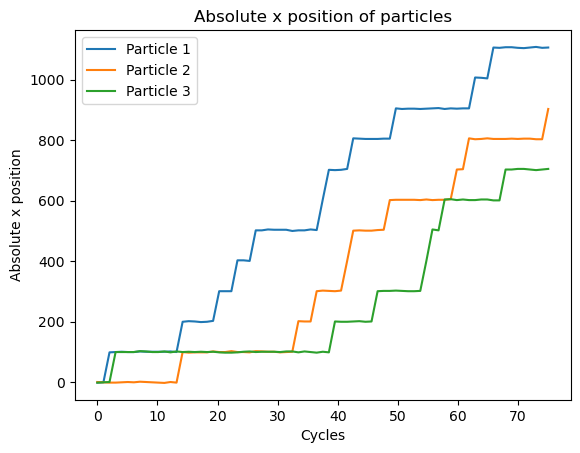

In [5]:
ParticlesAbsPos = opg3aSim()
for i, Pos in enumerate(ParticlesAbsPos): # plots each particles absolute position
    AbsolutePosAxis = np.linspace(0, len(Pos[::400]), len(Pos[::400]))
    plt.plot(AbsolutePosAxis, Pos[::400], markersize=1, label=f"Particle {i + 1}")

plt.title("Absolute x position of particles")
plt.xlabel(f"Cycles")
plt.ylabel("Absolute x position")
plt.legend()
plt.show()

We observe a trend where each particle tend to move towards the right. This models the physical phenomena of a motor protein traversing along the cytoskeleton of a cell. Each particle represents a arbitrary motor protein, while the two potentials is a model of two different energy landscapes where the motor protein may exist in.

- The constant potential describes a landscape in which the particle is in a diffused state. This describes a unbound state dominated by thermal energy. As a result, the movements of the particle is dominated by brownian motion, as it was described in the previous exercise. Thus, in this constant energy landscape, the particle is unbiased towards movement in any direction. In a physical sense, this models the motor protein being free to explore its surroundings. 

- This is in contrast to the particle being in the sawtooth potential. Physically, this represents the motor protein traversing a set direction in a bound state. The movement in this energy landscape is largely determined by the potential gradient, as the asymetric lanscape creates bias towards a bias towards a certain direction. This directed movement is often the effect of the motor protein exploiting the energy from ATP to drive its movement. 
<hr>

## 3b)
The movement of the particles create a current. In this task we are going to calculate the average current created in ten different cycles. Each of the particles will move 500 steps before switching potential. This is referred to as a cycle.

In [ ]:
# generateData(N_x * 12, opg3b=True)
averageCurrent01, averageCurrent02 = getData("opg3b")
for i, val in enumerate(averageCurrent01):
    print(f"cycle {i + 1}: {val:.2e}")

for i, val in enumerate(averageCurrent02):
    print(f"cycle {i + 1}: {val:.2e}")

Running opg3b
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
cycle 1: 3.89e-02
cycle 2: 2.72e-02
cycle 3: 2.71e-02
cycle 4: 2.73e-02
cycle 5: 2.78e-02
cycle 6: 2.79e-02
cycle 7: 2.89e-02
cycle 8: 2.70e-02
cycle 9: 2.59e-02
cycle 10: 2.71e-02
cycle 1: -2.95e-02
cycle 2: -1.39e-02
cycle 3: -1.31e-02
cycle 4: -1.38e-02
cycle 5: -1.36e-02
cycle 6: -1.21e-02
cycle 7: -1.41e-02
cycle 8: -1.06e-02
cycle 9: -1.23e-02
cycle 10: -1.21e-02


Code excecution with $N_{p} = N_{x} \cdot 12$

$\alpha = 0.8$

Simulation took 118.19 s with average time per particle 98.5 ms

Average current per cycle:

-2.99e-02 -1.02e-02 -1.15e-02 -1.45e-02 -1.41e-02 -1.04e-02 -1.32e-02 -1.24e-02 -1.08e-02 -1.29e-02

$\alpha = 0.1$

Simulation took 108.25 s with average time per particle 90.2 ms

Average current per cycle:

4.11e-02 2.73e-02 2.70e-02 2.93e-02 2.78e-02 2.67e-02 2.68e-02 2.76e-02 2.70e-02 2.71e-02

**Kommenter**: 
- write down the 10-cycle-averaged currents you obtain.
- Why do we get non-zero currents? Give a physical interpretation of this.
- Compare $J_(avg)(0)$ with $J_(avg)(n)$ for $n > 0.1$. Give a physical interpretation of the difference.

Repeat this process with $\alpha = 0.1$ and compare with the result from $\alpha = 0.8$.



<hr>

## 3c)
From now on all the particles start in $V_2$, with half of the particles initial position in the x-position corresponding to the minima of $V_1$, and the other half in the x-position corresponding to the second minima of $V_1$.

Running opg3c
Progress: |██████████████████████████████████████████████████| 100.0% Complete


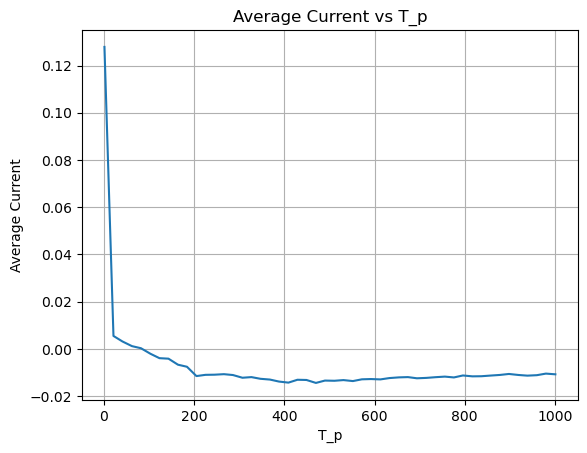

In [7]:
# generateData(N_x * 40, opg3c=True)
T_pList, averageCurrent03 = getData("opg3c")
plt.plot(T_pList, averageCurrent03)
plt.xlabel("T_p")
plt.ylabel("Average Current")
plt.title("Average Current vs T_p")
plt.grid()
plt.show()

**Kommenter**
What do you observe? give a physical interpretation of this.
<hr>

## 3d)

Running opg3d
Progress: |██████████████████████████████████████████████████| 100.0% Complete


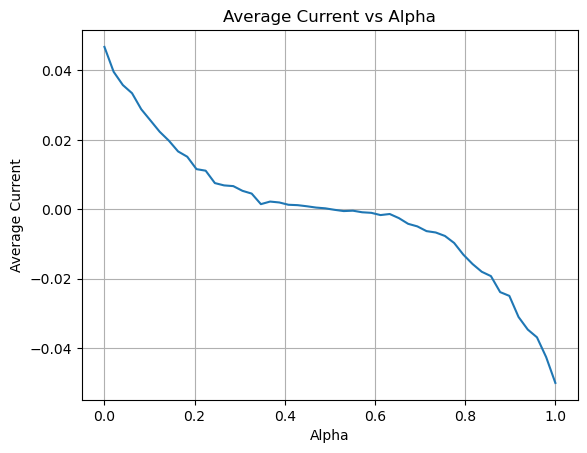

In [8]:
# generateData(N_x * 12, opg3d=True)
alphaList, averageCurrent04 = getData("opg3d")
plt.plot(alphaList, averageCurrent04)
plt.xlabel("Alpha")
plt.ylabel("Average Current")
plt.title("Average Current vs Alpha")
plt.grid()
plt.show()

**Kommenter**
What do you observe? Give a physical interpretation of the results.

## **Excercise4**

## 4a)

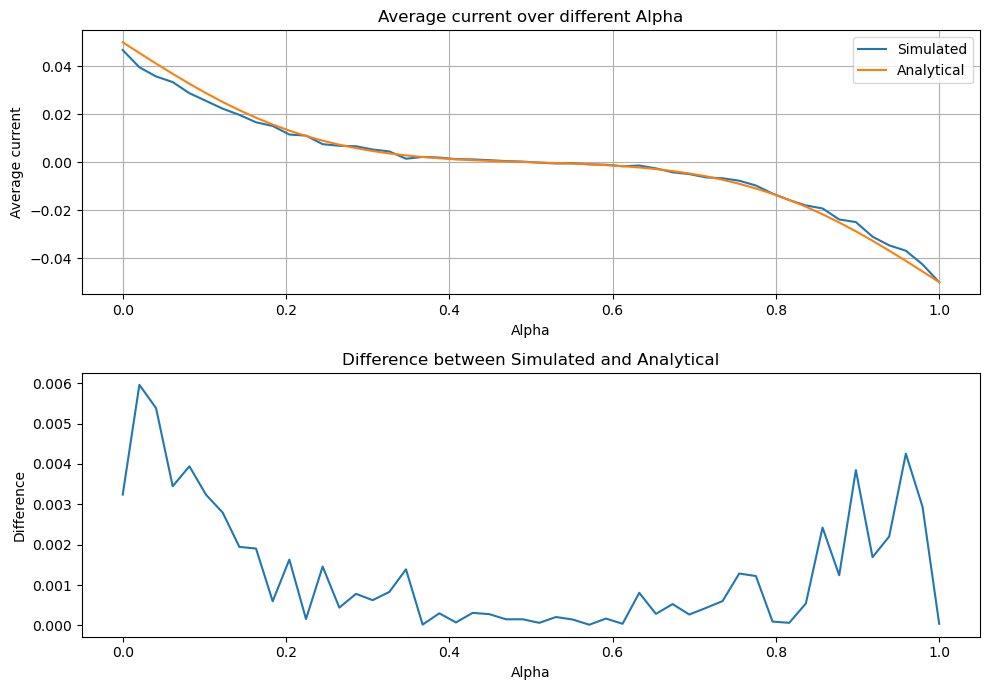

In [11]:
T_p = 500
N_x = 100
alphaList, averageCurrent04 = getData("opg3d")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
ax1.plot(alphaList, averageCurrent04, label="Simulated")
ax1.plot(alphaList, [analyticalAverageCurrent(alpha, T_p, N_x) for alpha in alphaList], label="Analytical")
ax1.set_xlabel("Alpha")
ax1.set_ylabel("Average current")
ax1.set_title("Average current over different Alpha")
ax1.grid()
ax1.legend()
ax2.plot(alphaList, [abs(sim - ana) for sim, ana in zip(averageCurrent04, [analyticalAverageCurrent(alpha, T_p, N_x) for alpha in alphaList])])
ax2.set_xlabel("Alpha")
ax2.set_ylabel("Difference")
ax2.set_title("Difference between Simulated and Analytical")

plt.tight_layout()
plt.show()

**Kommenter:**
Compare and comment the numerical and the analytical graph!

## 4b)

C:\Users\benja\AppData\Local\Temp\ipykernel_28988\2168790696.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


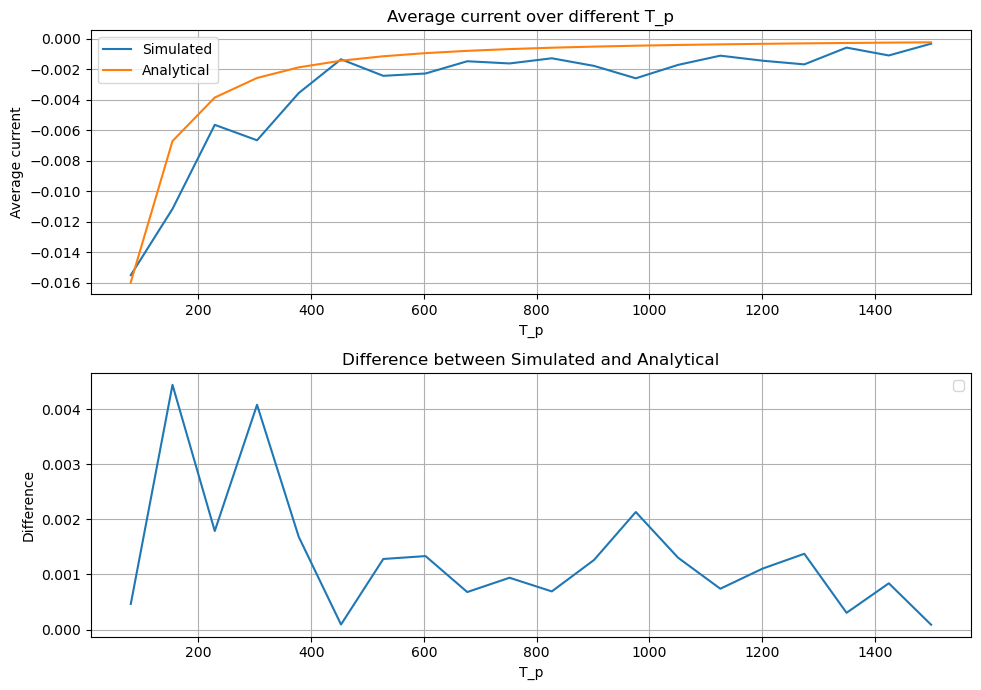

In [12]:
# generateData(400, opg4b=True)
alpha = 0.8
N_x = 10
T_pList, averageCurrent = getData("opg4b")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))
ax1.plot(T_pList, averageCurrent, label="Simulated")
ax1.plot(T_pList, [analyticalAverageCurrent(alpha, T_p, N_x) for T_p in T_pList], label="Analytical")
ax1.set_xlabel("T_p")
ax1.set_ylabel("Average current")
ax1.set_title("Average current over different T_p")
ax1.grid()
ax1.legend()
ax2.plot(T_pList, [abs(sim - ana) for sim, ana in zip(averageCurrent, [analyticalAverageCurrent(alpha, T_p, N_x) for T_p in T_pList])])
ax2.set_xlabel("T_p")
ax2.set_ylabel("Difference")
ax2.set_title("Difference between Simulated and Analytical")
ax2.grid()
ax2.legend()

plt.tight_layout()
plt.show()

**Kommenter:**
Compare and comment the numerical and the analytical graph!

## 4c)

Running opg4c
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Progress: |██████████████████████████████████████████████████| 100.0% Complete
[[-0.002041666666666666, 0.0013166666666666674, -0.00019999999999999952, -0.0017833333333333334, -0.0005833333333333335, -0.0026166666666666673, 0.0007583333333333329, 0.001508333333333333, -0.0015750000000000007, -0.0033083333333333333, 0.001233333333333334, -0.0014500000000000006, -0.0006333333333333326, -0.0010333333333333334, 0.003591666666666666, -0.0022500000000000003, -0.003916666666666667, -0.0010499999999999997, -0.0026416666666666667, 0.0025833333333333333, -0.0011583333333333333, 0.00353333333333

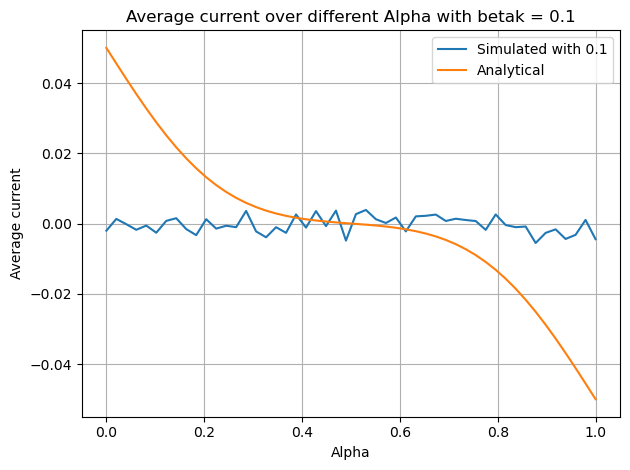

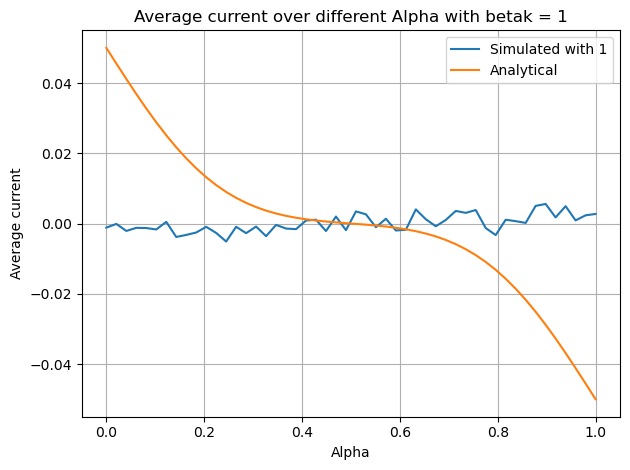

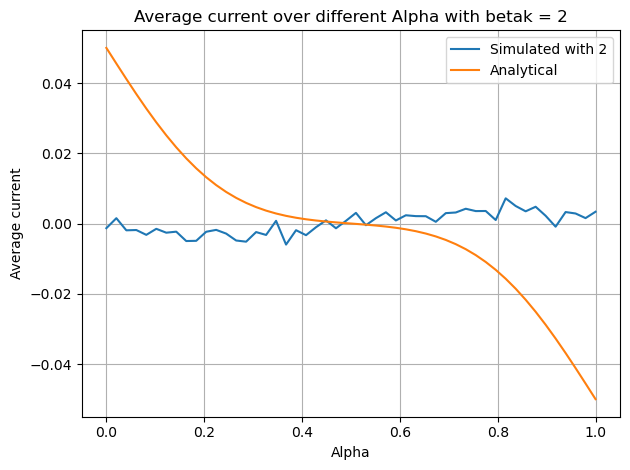

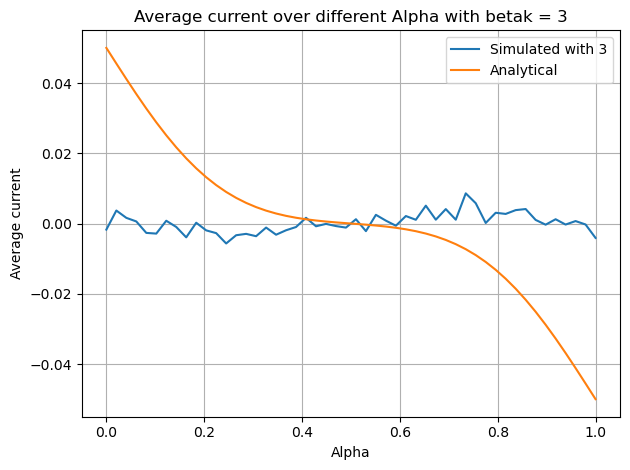

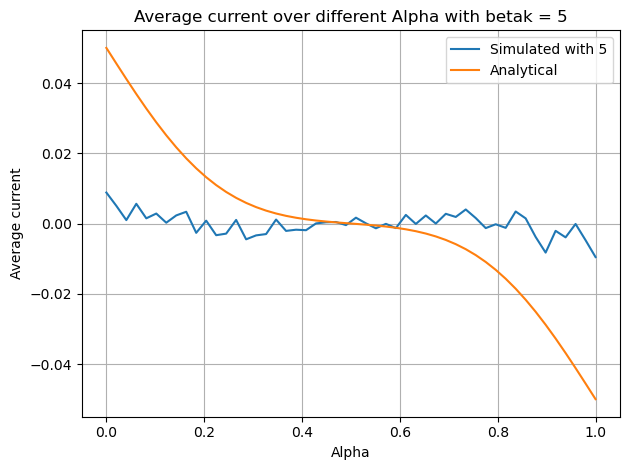

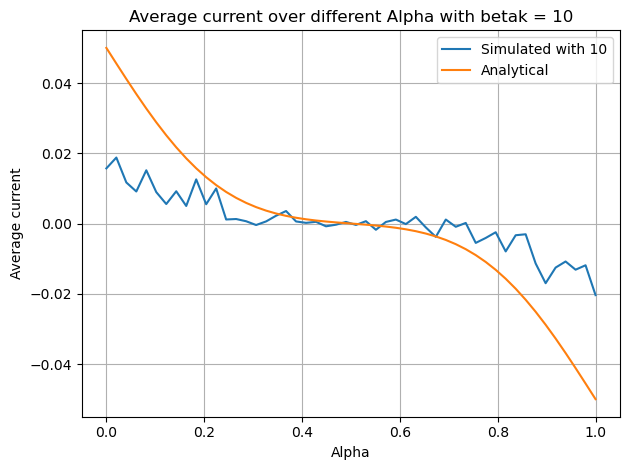

In [13]:
# generateData(N_x * 12, opg4c=True)
T_p = 500
N_x = 100
alphaList = np.linspace(0, 1, 50)
betakList = [0.1, 1, 2, 3, 5, 10]
averageCurrents = getData("opg4c")
print(averageCurrents)
for i, averageCurrent in enumerate(averageCurrents):
    
    plt.plot(alphaList, averageCurrent, label=f"Simulated with {betakList[i]}")
    plt.plot(alphaList, [analyticalAverageCurrent(alpha, T_p, N_x) for alpha in alphaList], label="Analytical")
    plt.xlabel("Alpha")
    plt.ylabel("Average current")
    plt.title(f"Average current over different Alpha with betak = {betakList[i]}")
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

**Kommenter:**
Compare and comment the numerical and the analytical graph!

## 4d)

**Kommenter:**
Your results in 4b) and 4c) should indicate that the "analytical argument" presented above has some
limitations. That is, the argument is not waterproof. Your last task in this exercise is to identify which
parts of the argument contains implicit assumptions, and under what circumstances these assumptions
do not hold!